In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../cix')
import myfuncs as mf
import pandas as pd
from rdkit import rdBase
rdBase.DisableLog('rdApp.*') # To make rdkit silent
from rdkit.Chem import PandasTools as pt
from rdkit.Chem import Descriptors
import numpy as np
import time
import os
from rdkit.Chem import RDConfig
from rdkit import Chem

/home/gonzalo/anaconda3/envs/cix/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [7]:
# Import drug data, keep only 310K random molecules
smidf = pd.read_csv("../data/z.smi", header = None, sep = ' ', names = ['smiles','zid'])
smidf.head()

,smiles,zid
0,COc1cc(Cl)cc2c1OC(C)C(=O)N(c1c(F)cccc1F)C2,s1
1,COc1ccc(N2CC(C(=O)Oc3cc(C)ccc3C)CC2=O)cc1,s2
2,CC1CCC(C(N)=O)CN1C(=O)Nc1cnn(C(C)(C)C)c1,s3
3,CN(Cc1nc2ccccc2c(=O)[nH]1)C(=O)c1cn2ccccc2n1,s4
4,CC(C)c1noc(C(C)N2CCN(CC(=O)N(C)C)CC2)n1,s5


In [8]:
cls = mf.clusmidf(smidf)

Clustering time: 00:06:54


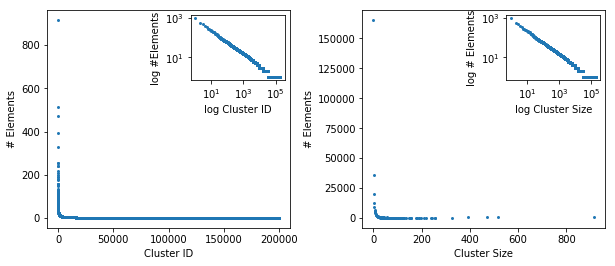

In [11]:
# Plot the clusters distributions and cluster size distribution
mf.plotmulticlus([cls], 10, 4)

In [13]:
cl_smis = []
for i in range(10):
    cl = cls[i]
    smis = [smidf.loc[smidf["zid"] == i, "smiles"].iloc[0] for i in cl]
    cl_smis.append(smis)

/home/gonzalo/anaconda3/envs/cix/lib/python2.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:172: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn("Truncating the list of molecules to be displayed to %d. Change the maxMols value to display more."%(maxMols))


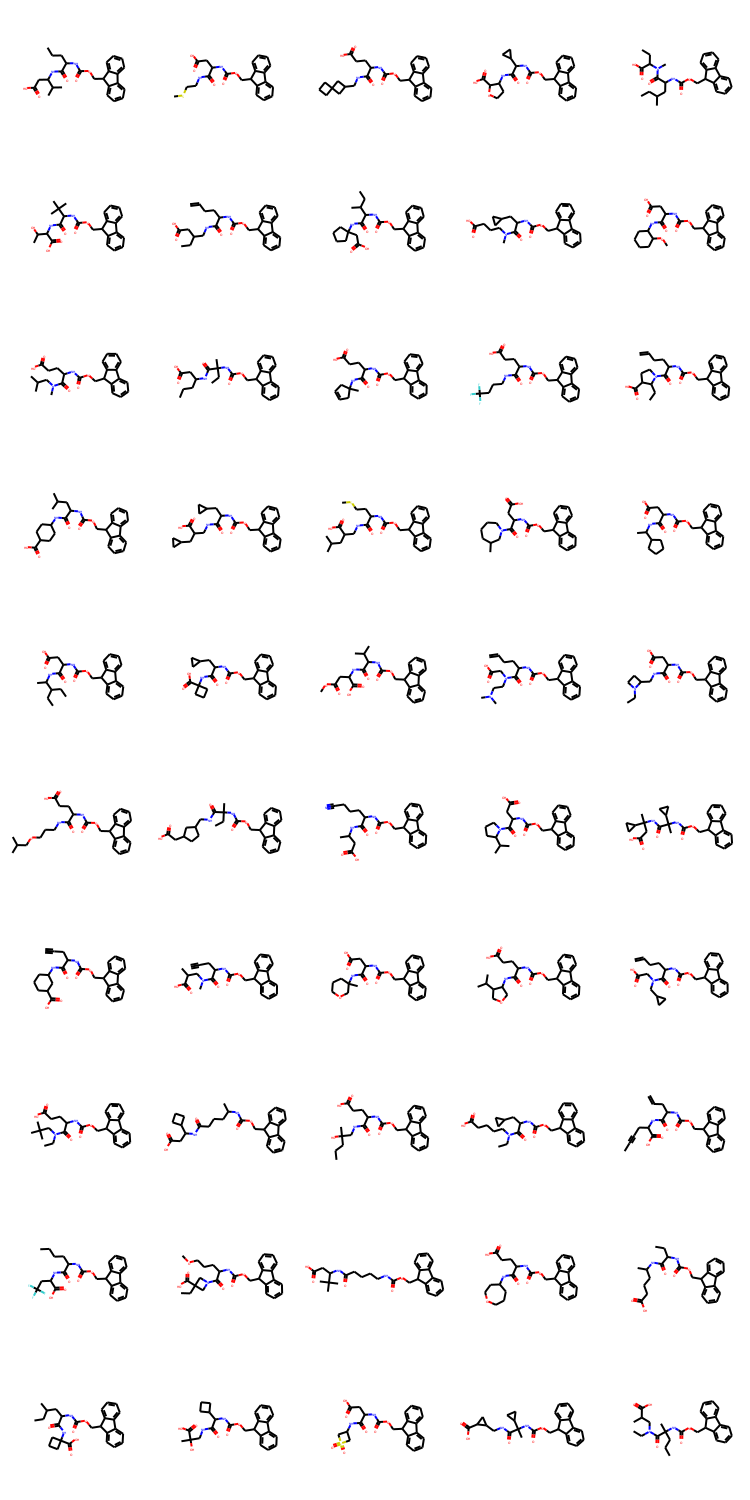

In [15]:
mf.paintmols(cl_smis[0])

In [17]:
cl_smis[0][0]

'CCCC(NC(=O)OCC1c2ccccc2-c2ccccc21)C(=O)NC(CC(=O)O)C(C)C'

In [36]:
mws0 = [Chem.Descriptors.MolWt(Chem.MolFromSmiles(s)) for s in cl_smis[0]]

(array([  3.,  10.,  30.,  19.,  91., 193., 238., 113., 186.,  32.]),
 array([394.427 , 404.8488, 415.2706, 425.6924, 436.1142, 446.536 ,
        456.9578, 467.3796, 477.8014, 488.2232, 498.645 ]),
 <a list of 10 Patch objects>)

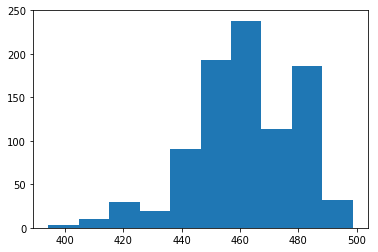

In [32]:
plt.hist(mws0, bins = 10)

In [37]:
logps0 = [Chem.Descriptors.MolLogP(Chem.MolFromSmiles(s)) for s in cl_smis[0]]

(array([  2.,   8.,  17.,  30.,  83., 116., 167., 167., 173., 152.]),
 array([0.7731 , 1.19196, 1.61082, 2.02968, 2.44854, 2.8674 , 3.28626,
        3.70512, 4.12398, 4.54284, 4.9617 ]),
 <a list of 10 Patch objects>)

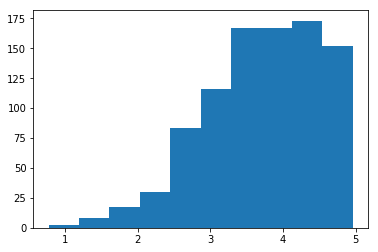

In [38]:
plt.hist(logps0, bins = 10)

In [41]:
min(logps0)

0.7731000000000019